In [1]:
import pandas as pd
import numpy as np

In [5]:
path = 'https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv'

!wget -O '../jamb_exam_results.csv' $path

--2025-02-03 18:26:46--  https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
140.82.114.4thub.com (github.com)... 
connected. to github.com (github.com)|140.82.114.4|:443... 
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv [following]
--2025-02-03 18:26:46--  https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
connected. to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... 
HTTP request sent, awaiting response... 200 OK
Length: 391501 (382K) [text/plain]
Saving to: ‘../jamb_exam_results.csv’

../jamb_exam_result 100%[===================>] 382.33K  1.20MB/s    in 0.3s    

2025-02-03 18:26:47 (1.20 MB/s) - ‘../jamb_exam_results.csv’ sav

In [2]:
df = pd.read_csv('jamb_exam_results.csv')

In [3]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [4]:
categorical_cols = list(df.dtypes[df.dtypes=='object'].index)

In [8]:
for col in categorical_cols:
    df[col] = df[col].str.lower().str.replace(' ','')

In [14]:
del df['student_id']

In [15]:
df.dtypes

jamb_score                        int64
study_hours_per_week              int64
attendance_rate                   int64
teacher_quality                   int64
distance_to_school              float64
school_type                      object
school_location                  object
extra_tutorials                  object
access_to_learning_materials     object
parent_involvement               object
it_knowledge                     object
age                               int64
gender                           object
socioeconomic_status             object
parent_education_level           object
assignments_completed             int64
dtype: object

In [16]:
df = df.fillna(0)

In [91]:
from sklearn.model_selection import train_test_split

In [107]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

In [108]:
len(df), len(df_full_train), len(df_train), len(df_val), len(df_test)

(5000, 4000, 3000, 1000, 1000)

In [109]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [110]:
y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

In [111]:
del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [40]:
df_train.head()

,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,20,72,3,4.4,public,urban,no,yes,medium,low,21,female,low,0,3
1,11,80,2,3.3,public,urban,yes,yes,medium,high,22,female,medium,secondary,1
2,31,82,1,8.3,public,urban,yes,yes,low,high,19,female,high,tertiary,2
3,29,79,1,15.8,public,rural,yes,yes,low,low,19,male,low,primary,2
4,28,96,2,8.9,private,rural,yes,yes,medium,low,19,male,high,secondary,3


In [41]:
from sklearn.feature_extraction import DictVectorizer

In [42]:
dv = DictVectorizer(sparse=True)

dict_train = df_train.to_dict(orient='records')
X_train = dv.fit_transform(dict_train)

dict_val = df_val.to_dict(orient='records')
X_val = dv.transform(dict_val)

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
dt = DecisionTreeRegressor(max_depth=1, )

dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [48]:
from sklearn.tree import export_text

In [60]:
print(export_text(dt, 
                  feature_names=list(dv.get_feature_names_out())
                 )
     )

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



In [59]:
# Question 1: study_hours_per_week

array(['access_to_learning_materials=no',
       'access_to_learning_materials=yes', 'age', 'assignments_completed',
       'attendance_rate', 'distance_to_school', 'extra_tutorials=no',
       'extra_tutorials=yes', 'gender=female', 'gender=male',
       'it_knowledge=high', 'it_knowledge=low', 'it_knowledge=medium',
       'parent_education_level', 'parent_education_level=primary',
       'parent_education_level=secondary',
       'parent_education_level=tertiary', 'parent_involvement=high',
       'parent_involvement=low', 'parent_involvement=medium',
       'school_location=rural', 'school_location=urban',
       'school_type=private', 'school_type=public',
       'socioeconomic_status=high', 'socioeconomic_status=low',
       'socioeconomic_status=medium', 'study_hours_per_week',
       'teacher_quality'], dtype=object)

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [62]:
rf = RandomForestRegressor(n_estimators=10,
                          random_state=1,
                          n_jobs=-1)

In [65]:
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

42.13724207871227

In [66]:
# Question2: 42.13

In [68]:
np.arange(10,201,10)

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])

In [120]:
rf_scores = []
for i in np.arange(10,201,10):
    rf = RandomForestRegressor(n_estimators=i,
                          random_state=1,
                          n_jobs=-1)
    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    
    rmse = mean_squared_error(y_val, y_pred, squared=False)

    rf_scores.append((i, rmse))

df_scores = pd.DataFrame(data=rf_scores, columns = ['n_estimators','rmse'])

In [113]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

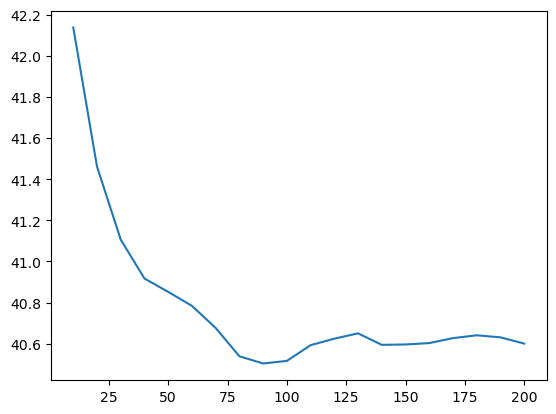

In [122]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

In [126]:
df_scores.sort_values(by='rmse', ascending=True)

,n_estimators,rmse
8,90,40.504346
9,100,40.516805
7,80,40.539333
10,110,40.593353
13,140,40.594852
14,150,40.596715
19,200,40.601019
15,160,40.603508
11,120,40.624850
16,170,40.627546


In [123]:
# Question 3: 80

In [127]:
rf_scores = []
for d in [10, 15, 20, 25]:
    for i in np.arange(10,201,10):
        rf = RandomForestRegressor(n_estimators=i,
                                   random_state=1,
                                   n_jobs=-1,
                                   max_depth = d
                              
                            )
        
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        
        rmse = mean_squared_error(y_val, y_pred, squared=False)
    
        rf_scores.append((d, i, rmse))

df_scores = pd.DataFrame(data=rf_scores, columns = ['max_depth','n_estimators','rmse'])

In [128]:
df_scores.sort_values(by='rmse', ascending=True)

,max_depth,n_estimators,rmse
8,10,90,40.173900
7,10,80,40.210305
9,10,100,40.250490
3,10,40,40.270069
5,10,60,40.277035
...,...,...,...
21,15,20,41.455699
61,25,20,41.470970
20,15,10,42.003979
40,20,10,42.024831


In [ ]:
# Question4: 10

In [129]:
rf = RandomForestRegressor(n_estimators=10,
                                   random_state=1,
                                   n_jobs=-1,
                                   max_depth = 20
                              
                            )
        
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [135]:
df_feature_importance = pd.DataFrame(data=list(zip(dv.get_feature_names_out(), rf.feature_importances_)), columns=['feature_names', 'importance'])

In [136]:
df_feature_importance.sort_values(by='importance', ascending=False)

,feature_names,importance
27,study_hours_per_week,0.248354
4,attendance_rate,0.149729
5,distance_to_school,0.136486
28,teacher_quality,0.082682
2,age,0.069311
3,assignments_completed,0.031517
24,socioeconomic_status=high,0.025714
17,parent_involvement=high,0.022919
10,it_knowledge=high,0.017719
15,parent_education_level=secondary,0.016957


In [ ]:
# Question5: study_hours_per_week

In [137]:
import xgboost as xgb

In [138]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train,feature_names=features)
dval= xgb.DMatrix(X_val, label=y_val,feature_names=features)

In [139]:
watchlist = [(dtrain, 'train'), (dval,'dval')]

In [229]:
dict_eta = {}

In [233]:
%%capture output
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist,verbose_eval=5)

In [234]:

rmse_scores=[]
def parse_output(output):
    s = output.stdout
    for line in s.strip().split('\n'):
        idx, train_rmse, val_rmse = line.split('\t')
        idx = int(idx.strip('[]'))
        train_rmse = float(train_rmse.split(':')[1])
        val_rmse = float(val_rmse.split(':')[1])
        rmse_scores.append((idx, train_rmse, val_rmse))
    df_rmse = pd.DataFrame(data=rmse_scores, columns = ['idx','train_rmse', 'val_rmse'])

    return df_rmse

In [235]:
dict_eta['eta=0.3'] = parse_output(output)
dict_eta.keys()

dict_keys(['eta=0.1', 'eta=0.3'])

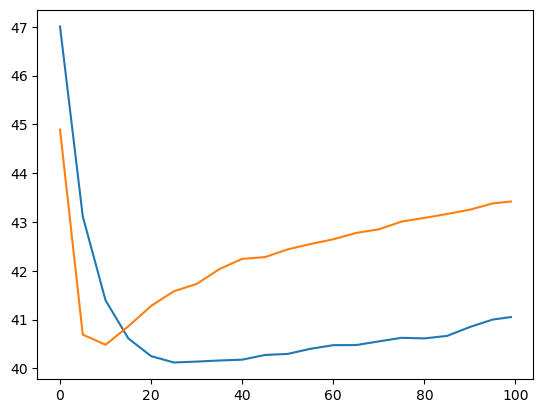

In [236]:
etas=[0.1,0.3]
for eta in etas:
    df_eta = dict_eta[f'eta={eta}']
    plt.plot(df_eta.idx, df_eta.val_rmse)
